<a href="https://colab.research.google.com/github/sarmi2325/Neural_Network/blob/main/Linear_Regression_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importing Libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [4]:
#torch.linspace(-5, 5, 100) returns a 1D tensor of shape (100,)
#Neural networks in PyTorch expect input in the format (batch_size, input_features)
X = torch.unsqueeze(torch.linspace(-5, 5, 100), dim=1)
y = 3 * X + 2 + 0.5 * torch.randn(X.size())


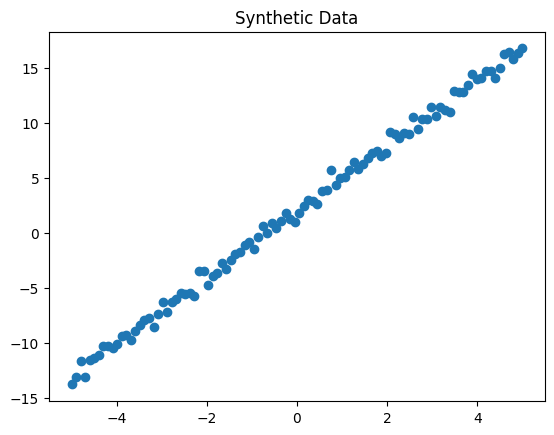

In [5]:
#PyTorch uses torch.Tensor, but Matplotlib expects NumPy arrays.
plt.scatter(X.numpy(), y.numpy())
plt.title("Synthetic Data")
plt.show()


In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)   #y=xWT +b

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()


In [7]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [8]:
epochs = 100

for epoch in range(epochs):
  #model.train()-Sets model to training mode. Enables dropout, batch norm, etc
  #model.eval()-Sets model to evaluation mode — disables things like dropout
    model.train()

    y_pred = model(X)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()        #Clears previous gradients stored in the model parameters
    loss.backward()              #Computes gradients of the loss with respect to model parameters using autograd - computes the direction
    optimizer.step()             #Updates the weights using the computed gradients - moves in that direction

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 10/100, Loss: 5.7146
Epoch 20/100, Loss: 2.1107
Epoch 30/100, Loss: 1.4497
Epoch 40/100, Loss: 1.0503
Epoch 50/100, Loss: 0.7847
Epoch 60/100, Loss: 0.6074
Epoch 70/100, Loss: 0.4891
Epoch 80/100, Loss: 0.4100
Epoch 90/100, Loss: 0.3573
Epoch 100/100, Loss: 0.3221


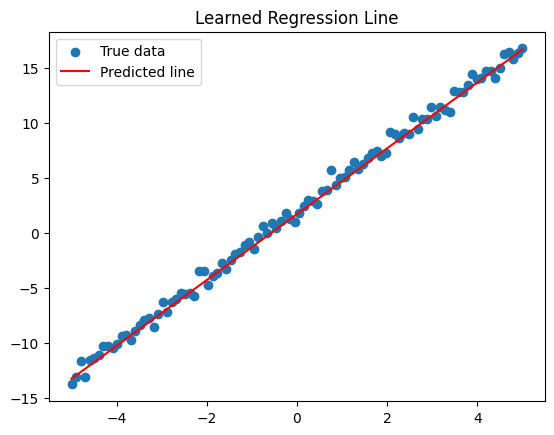

In [9]:
predicted = model(X).detach()

plt.scatter(X.numpy(), y.numpy(), label="True data")
plt.plot(X.numpy(), predicted.numpy(), 'r-', label="Predicted line")
plt.legend()
plt.title("Learned Regression Line")
plt.show()
